In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

import warnings 
warnings.filterwarnings('ignore')
# !pip install sidetable
import sidetable as stb

In [2]:
df = pd.read_csv(r'D:\belajar data scientist\Purwadhika\Dataset final project\dataset mobil\cleanver2.csv')


In [3]:
df.isna().sum()

price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
state           0
lat             0
long            0
dtype: int64

In [4]:
df.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long
0,8750,2013,hyundai,sonata,excellent,4 cylinders,gas,90821.0,clean,automatic,fwd,other,other,grey,mn,46.9074,-92.4638
1,10900,2013,toyota,prius,good,4 cylinders,hybrid,92800.0,clean,automatic,fwd,other,other,blue,ct,41.1770,-73.1336
2,13995,2012,ford,f-150,good,6 cylinders,gas,188406.0,clean,automatic,4wd,full-size,truck,grey,mn,45.6836,-92.9648
3,7995,2010,chevrolet,equinox,good,4 cylinders,gas,108124.0,clean,automatic,4wd,full-size,SUV,grey,mn,45.6836,-92.9648
4,8995,2011,chevrolet,traverse,good,6 cylinders,gas,178054.0,clean,automatic,4wd,full-size,SUV,white,mn,45.6836,-92.9648


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210467 entries, 0 to 210466
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         210467 non-null  int64  
 1   year          210467 non-null  int64  
 2   manufacturer  210467 non-null  object 
 3   model         210467 non-null  object 
 4   condition     210467 non-null  object 
 5   cylinders     210467 non-null  object 
 6   fuel          210467 non-null  object 
 7   odometer      210467 non-null  float64
 8   title_status  210467 non-null  object 
 9   transmission  210467 non-null  object 
 10  drive         210467 non-null  object 
 11  size          210467 non-null  object 
 12  type          210467 non-null  object 
 13  paint_color   210467 non-null  object 
 14  state         210467 non-null  object 
 15  lat           210467 non-null  float64
 16  long          210467 non-null  float64
dtypes: float64(3), int64(2), object(12)
memory usage

In [6]:
def correlation_ratio(categories, measurement):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0, cat_num):
        cat_measure = measurement[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measure)
        y_avg_array[i] = np.average(cat_measure)
    y_total_avg = np.sum(np.multiply(y_avg_array, n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array, np.power(np.subtract(y_avg_array, y_total_avg), 2)))
    denominator = np.sum(np.power(np.subtract(measurement, y_total_avg), 2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator/denominator)
    return eta

In [7]:
cat_col= df.select_dtypes(include=['object']).columns
cat_col

Index(['manufacturer', 'model', 'condition', 'cylinders', 'fuel',
       'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color',
       'state'],
      dtype='object')

In [8]:
cat_col

Index(['manufacturer', 'model', 'condition', 'cylinders', 'fuel',
       'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color',
       'state'],
      dtype='object')

In [9]:
for i in cat_col:
  print(f"{i}\t: {correlation_ratio(df[i], df['price'])}")

manufacturer	: 0.010663997193949898
model	: 0.0898274703988296
condition	: 0.004571634607276086
cylinders	: 0.0029509645784204386
fuel	: 0.0006378414444425607
title_status	: 0.0006967034063281234
transmission	: 0.0007253074857242026
drive	: 0.002580930830885102
size	: 0.009369531776096195
type	: 0.005483614123582214
paint_color	: 0.008241581573832004
state	: 0.021132582408584292


In [10]:
df.corr()

,price,year,odometer,lat,long
price,1.000000,0.000935,0.000094,-0.001845,0.000876
year,0.000935,1.000000,-0.365528,-0.006074,-0.130693
odometer,0.000094,-0.365528,1.000000,-0.007705,0.072730
lat,-0.001845,-0.006074,-0.007705,1.000000,-0.224665
long,0.000876,-0.130693,0.072730,-0.224665,1.000000


In [40]:
#untuk mendefine Q3 danQ1 dari funding total usd
Q3_price= df.describe()['price']['75%']
Q1_price = df.describe()['price']['25%']
print(Q3_price)

23990.0


In [41]:
#untuk mencari IQR dari funding total usd
IQR = Q3_price-Q1_price

IQR

15090.0

In [42]:
#untuk mencari upper fence
UpperFence = Q3_price + (1.5*IQR)

UpperFence

46625.0

In [43]:
#untuk mencari lower fence
LowerFence = Q1_price - (1.5*IQR)

LowerFence

-13735.0

In [44]:
df['price'].describe()

count    2.104670e+05
mean     3.264589e+04
std      5.454409e+06
min      1.000000e+00
25%      8.900000e+03
50%      1.499000e+04
75%      2.399000e+04
max      2.490531e+09
Name: price, dtype: float64

In [45]:
len(df['price'])

210467

In [48]:
len(Outliers)/len(df['price'])*100

3.876617236906498

In [47]:
#untuk menampilkan data outlier
Outliers = df[(df['price'] < LowerFence) | (df['price'] > UpperFence)]

Outliers.sort_values(by= 'price', ascending=False)


,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long
23379,2490531375,2014,dodge,dart,good,4 cylinders,gas,112589.000000,clean,automatic,fwd,compact,sedan,red,ga,33.9845,-84.1529
53984,123456789,2012,toyota,fj cruisers,good,6 cylinders,gas,85020.299924,clean,automatic,4wd,mid-size,offroad,white,id,47.6406,-117.5950
48216,123456789,2011,honda,accord,other,other,gas,85020.299924,clean,automatic,other,other,other,white,ms,32.0186,-90.2996
81657,123456789,2009,cadillac,dts,excellent,8 cylinders,gas,87000.000000,clean,automatic,fwd,full-size,sedan,white,oh,39.8716,-83.9195
143651,111111111,2015,Others,SUV OR CAR,excellent,other,gas,85020.299924,clean,automatic,other,other,other,white,fl,28.9299,-81.9256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22570,46787,2019,ford,f450 super,other,other,gas,56382.000000,clean,automatic,other,other,other,white,ms,32.3811,-89.4805
9258,46777,2018,lincoln,mkx reserve,new,6 cylinders,gas,11.000000,clean,automatic,4wd,mid-size,SUV,brown,wa,48.1075,-123.3650
65226,46765,2014,Others,Super Duty F-250 SRW,other,8 cylinders,other,1181.000000,clean,automatic,4wd,other,pickup,white,ca,35.6448,-120.6550
112952,46741,2017,gmc,sierra 1500 denali 2wd 143wb,good,8 cylinders,other,36101.000000,clean,automatic,other,other,pickup,white,la,30.4041,-91.0569


In [49]:
df = df.drop(df[(df['price'] < LowerFence) | (df['price'] > UpperFence)].index)


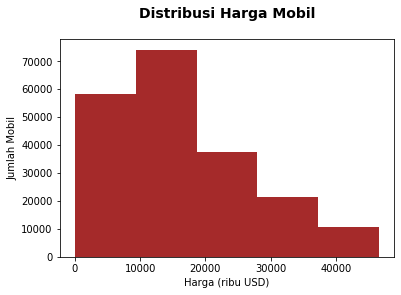

In [50]:
plt.hist(df["price"], bins = 5, color = "brown")
plt.title("Distribusi Harga Mobil", fontdict = {'fontsize': 14,
        'fontweight' : "bold",
        'color' : "black",
        'verticalalignment': 'baseline',
        'horizontalalignment': "center"
        }, y = 1.07)
plt.ylabel("Jumlah Mobil")
plt.xlabel("Harga (ribu USD)")
plt.show()


In [51]:
Outliers

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long
43,60000,2018,gmc,sierra denali 2500 hd,excellent,8 cylinders,diesel,81000.0,clean,automatic,4wd,other,truck,white,mn,46.7400,-92.1581
157,66995,2018,ford,f-350 lifted crew cab lariat sb 4x4 6.7 powers...,other,8 cylinders,other,37865.0,clean,automatic,4wd,other,pickup,grey,nm,33.3917,-111.9250
159,95000,2008,Others,FREIGHTLINER M2,other,other,diesel,79000.0,clean,automatic,4wd,other,truck,white,mn,34.1072,-117.4550
162,150000,2017,Others,KENWORTH T3 SERIES,other,other,gas,6086.0,clean,other,fwd,other,truck,white,mn,34.1072,-117.4550
181,46900,2018,ford,f-350 super duty,excellent,8 cylinders,gas,24099.0,clean,automatic,4wd,full-size,other,red,ny,42.4759,-73.3773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210308,51495,2019,chevrolet,silverado 1500,other,other,gas,5551.0,clean,automatic,other,other,other,white,nj,40.2043,-74.1779
210316,56900,2018,ram,2500 diesel,like new,6 cylinders,diesel,12800.0,clean,automatic,4wd,other,pickup,black,mn,46.1696,-93.4741
210317,101999,2020,chevrolet,silverado 3500hd,like new,8 cylinders,gas,7200.0,clean,automatic,4wd,other,truck,silver,mn,46.5879,-94.2528
210320,46995,2019,ford,super duty f-250,excellent,8 cylinders,diesel,81870.0,clean,automatic,4wd,full-size,pickup,white,ny,43.4883,-76.3935


In [24]:
len(df)

202308

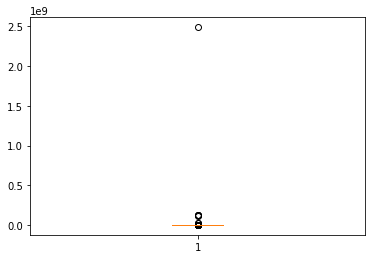

In [11]:
plt.boxplot(df['price'])
plt.show()

In [52]:
df[(df['price'] < LowerFence) | (df['price'] > UpperFence)]

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long


<function matplotlib.pyplot.show(*args, **kw)>

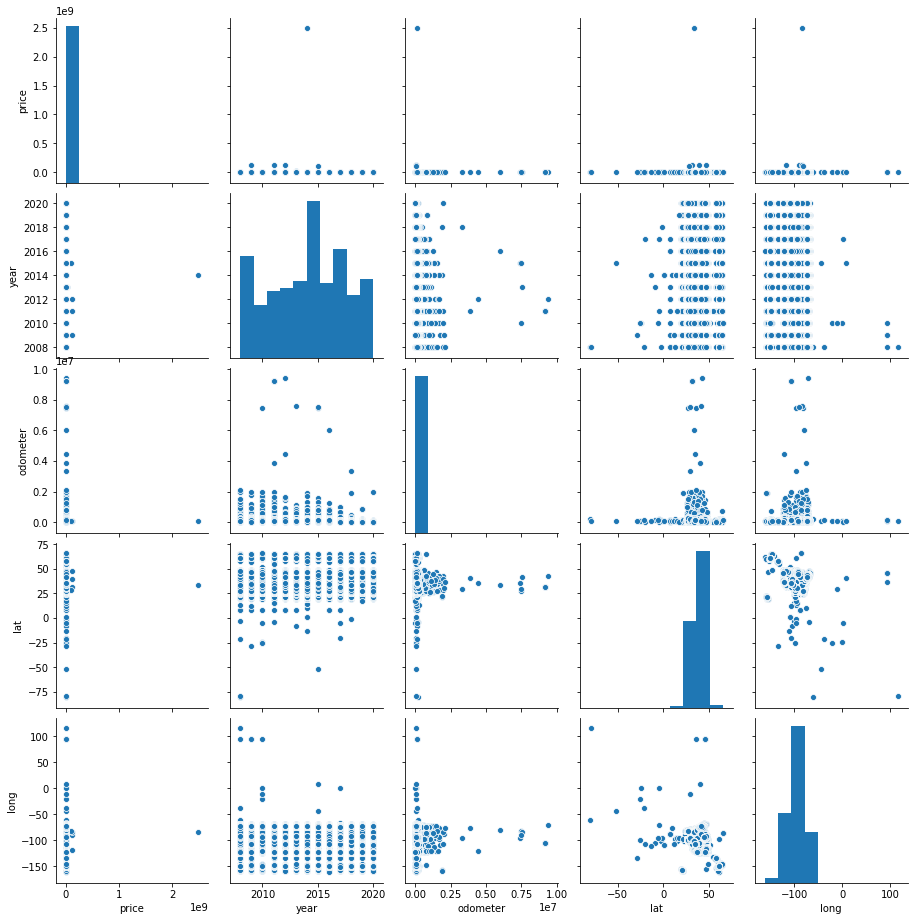

In [13]:
sns.pairplot(df)
plt.show

In [77]:
### Splitting Data

In [11]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

In [53]:
X = df.drop(columns=['price','lat','long','model'])
y = df['price']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=42)

In [55]:
X_train.head()

,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
47619,2019,ford,other,4 cylinders,gas,10118.0,clean,automatic,fwd,other,sedan,black,or
196003,2013,dodge,other,other,gas,142447.0,clean,automatic,other,other,other,white,mi
148407,2010,ram,other,6 cylinders,diesel,207488.0,clean,automatic,4wd,other,pickup,white,il
142346,2008,chevrolet,other,other,other,203310.0,clean,automatic,rwd,other,van,white,mi
46950,2018,honda,other,4 cylinders,gas,2191.0,clean,automatic,fwd,mid-size,SUV,white,al


In [15]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler, RobustScaler

In [56]:
cat_columns = ['manufacturer', 'condition','cylinders','fuel','title_status','transmission','drive','size','type','paint_color','state']

num_columns = ['year', 'odometer']

In [57]:
numerical_pipeline = Pipeline([
    ('scaler', RobustScaler())
#     ('poli', PolynomialFeature()) # Kalo mau tambah polynomial
])


categorical_pipeline = Pipeline([
    ('encoder', OneHotEncoder())
])

In [58]:
X_train_num = numerical_pipeline.fit_transform(X_train[num_columns])

In [59]:
X_train_num

array([[ 0.83333333, -1.08318583],
       [-0.16666667,  0.83046566],
       [-0.66666667,  1.77104411],
       ...,
       [ 0.5       , -0.90842082],
       [-0.16666667,  1.56152856],
       [-0.66666667,  0.36767462]])

In [60]:
X_train_Cat = categorical_pipeline.fit_transform(X_train[cat_columns])

In [61]:
X_train_Cat.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [22]:
from sklearn.compose import ColumnTransformer

In [62]:
preprocessor = ColumnTransformer([
    ('numeric', numerical_pipeline, num_columns),
    ('categoric', categorical_pipeline, cat_columns)
])

In [63]:
X_train.head()

,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
47619,2019,ford,other,4 cylinders,gas,10118.0,clean,automatic,fwd,other,sedan,black,or
196003,2013,dodge,other,other,gas,142447.0,clean,automatic,other,other,other,white,mi
148407,2010,ram,other,6 cylinders,diesel,207488.0,clean,automatic,4wd,other,pickup,white,il
142346,2008,chevrolet,other,other,other,203310.0,clean,automatic,rwd,other,van,white,mi
46950,2018,honda,other,4 cylinders,gas,2191.0,clean,automatic,fwd,mid-size,SUV,white,al


In [64]:
X_train_prep = preprocessor.fit_transform(X_train)

In [65]:
X_test_prep = preprocessor.fit_transform(X_test)

In [27]:
from scipy.stats import skew
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [28]:
print("Jumlah data latih : ", len(X_train))
print("Jumlah data uji : ", len(X_test))

Jumlah data latih :  168373
Jumlah data uji :  42094


In [29]:
X_test_prep

<42094x153 sparse matrix of type '<class 'numpy.float64'>'
	with 538040 stored elements in Compressed Sparse Row format>

In [30]:
# Algorithms
# Linear Regression
LinReg = LinearRegression().fit(X_train_prep, y_train)


# # Random Forest Regressor
# RanFor = RandomForestRegressor().fit(X_train_prep, y_train)

# # Support Vector Machine Regressor
# SVM = SVR().fit(X_train_prep, y_train)

# # K - Nearest Neighbors Regressor
# KNN = KNeighborsRegressor().fit(X_train_prep, y_train)

# # Extreme Gradient Boosting Regressor
# XGB = XGBRegressor().fit(X_train_prep, y_train)


In [66]:
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', LinearRegression())
])

In [67]:
linregpip = pipeline.fit(X_train, y_train)

In [68]:
LinRegPredTrain = linregpip.predict(X_train)
# LinRegPredTest = linregpip.predict(X_test)
LinRegPredTrain

array([16975.65271956, 10464.513805  , 25300.37847633, ...,
       13623.27982769, 20076.38964932, 12769.42067144])

In [69]:
X_train

,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
47619,2019,ford,other,4 cylinders,gas,10118.000000,clean,automatic,fwd,other,sedan,black,or
196003,2013,dodge,other,other,gas,142447.000000,clean,automatic,other,other,other,white,mi
148407,2010,ram,other,6 cylinders,diesel,207488.000000,clean,automatic,4wd,other,pickup,white,il
142346,2008,chevrolet,other,other,other,203310.000000,clean,automatic,rwd,other,van,white,mi
46950,2018,honda,other,4 cylinders,gas,2191.000000,clean,automatic,fwd,mid-size,SUV,white,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...
124729,2017,kia,good,4 cylinders,gas,85020.299924,clean,automatic,other,other,other,white,ca
107965,2008,toyota,other,other,gas,88939.000000,clean,automatic,4wd,other,pickup,brown,pa
137227,2017,chevrolet,good,other,electric,22203.000000,clean,automatic,other,other,hatchback,white,pa
152787,2013,chevrolet,excellent,8 cylinders,gas,193000.000000,clean,automatic,4wd,full-size,truck,white,oh


In [96]:
X_test

,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
124442,2013,mazda,other,6 cylinders,gas,121459.0,clean,automatic,fwd,mid-size,SUV,custom,al
24311,2010,kia,good,6 cylinders,gas,206300.0,clean,automatic,4wd,mid-size,SUV,blue,oh
167351,2011,jeep,like new,6 cylinders,gas,153947.0,clean,automatic,4wd,full-size,SUV,green,mo
198547,2019,honda,other,6 cylinders,gas,1417.0,salvage,automatic,other,other,SUV,custom,nv
157812,2018,toyota,other,other,gas,65575.0,clean,automatic,fwd,other,sedan,white,ca
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100101,2015,subaru,other,other,gas,68.0,clean,manual,other,other,other,grey,sc
24560,2014,bmw,other,other,gas,80318.0,clean,automatic,other,sub-compact,coupe,white,nv
105498,2016,bmw,other,6 cylinders,gas,82221.0,clean,automatic,4wd,compact,wagon,silver,il
182184,2011,kia,other,other,gas,118000.0,clean,automatic,4wd,other,other,white,sd


In [70]:
LinRegPredTest = linregpip.predict(X_test)


In [71]:
LinReg_R2_train = r2_score(y_train, LinRegPredTrain)
LinReg_MAE_train = mean_absolute_error(y_train, LinRegPredTrain)
LinReg_MSE_train = mean_squared_error(y_train, LinRegPredTrain)
LinReg_RMSE_train = np.sqrt(LinReg_MSE_train)

In [72]:
baseModelTrain = pd.DataFrame({
    "R2 Score" : [LinReg_R2_train],
    "MAE" : [LinReg_MAE_train],
    "MSE" : [LinReg_MSE_train],
    "RMSE" : [LinReg_RMSE_train]
}, index = ["LinReg"])

print("Hasil metrik evaluasi tiap algoritma (data latih):")
display(baseModelTrain)

Hasil metrik evaluasi tiap algoritma (data latih):


,R2 Score,MAE,MSE,RMSE
LinReg,0.59058,4681.12891,4.418494e+07,6647.175534


In [73]:
LinReg_R2_test = r2_score(y_test, LinRegPredTest)
LinReg_MAE_test = mean_absolute_error(y_test, LinRegPredTest)
LinReg_MSE_test = mean_squared_error(y_test, LinRegPredTest)
LinReg_RMSE_test = np.sqrt(LinRegPredTest)

In [74]:
baseModelTest = pd.DataFrame({
    "R2 Score" : [LinReg_R2_test],
    "MAE" : [LinReg_MAE_test],
    "MSE" : [LinReg_MSE_test],
    "RMSE" : [LinReg_RMSE_test]
}, index = ["LinReg"])

print("Hasil metrik evaluasi tiap algoritma (data latih):")
display(baseModelTest)

Hasil metrik evaluasi tiap algoritma (data latih):


,R2 Score,MAE,MSE,RMSE
LinReg,0.585847,4700.28231,4.450021e+07,"[111.65349276699071, 81.57293165933343, 119.12..."


In [79]:
pip_knn = Pipeline([
    ('prep', preprocessor),
    ('algo', KNeighborsRegressor())
])

In [80]:
KNN_pip = pip_knn.fit(X_train, y_train)


In [81]:
predknn_train = KNN_pip.predict(X_train)
# LinRegPredTest = linregpip.predict(X_test)

KeyboardInterrupt: 

In [ ]:
predknn_test = KNN_pip.predict(X_test)
